In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[]

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory (
    'PlantVillage',
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 11026 files belonging to 7 classes.


In [45]:
len(dataset)

345

In [13]:
CLASS_NAMES = dataset.class_names
CLASS_NAMES

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy']

In [14]:
data_iterator = dataset.as_numpy_iterator()

In [15]:
batch = data_iterator.next()
batch[0]

array([[[[197., 194., 189.],
         [197., 194., 189.],
         [197., 194., 189.],
         ...,
         [218., 214., 211.],
         [217., 213., 210.],
         [217., 213., 210.]],

        [[200., 197., 192.],
         [199., 196., 191.],
         [199., 196., 191.],
         ...,
         [218., 214., 211.],
         [218., 214., 211.],
         [218., 214., 211.]],

        [[201., 198., 193.],
         [201., 198., 193.],
         [201., 198., 193.],
         ...,
         [218., 214., 211.],
         [218., 214., 211.],
         [218., 214., 211.]],

        ...,

        [[121., 110., 104.],
         [131., 120., 114.],
         [138., 127., 121.],
         ...,
         [161., 153., 150.],
         [165., 157., 154.],
         [153., 145., 142.]],

        [[120., 109., 103.],
         [131., 120., 114.],
         [138., 127., 121.],
         ...,
         [167., 159., 156.],
         [167., 159., 156.],
         [158., 150., 147.]],

        [[151., 140., 134.],
       

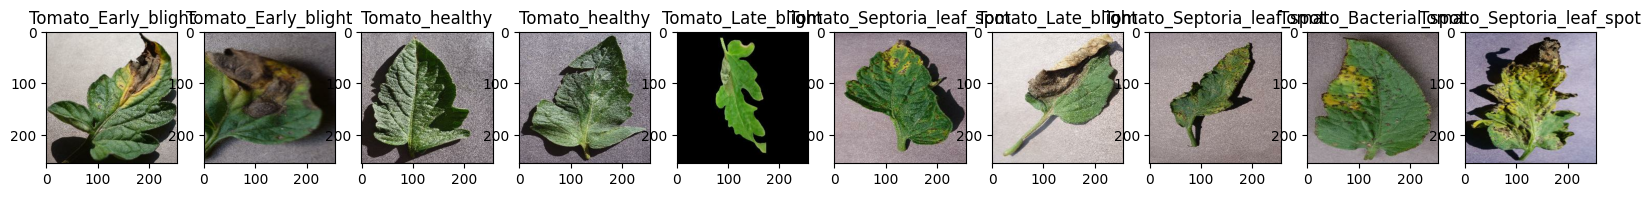

In [16]:
#Tomato_Bacterial_spot = 0
#Tomato_Early_Blight = 1
#Tomato_Late_Blight = 2
#Tomato_Leaf_Mold = 3
#Tomato_Septoria_Leaf_Spot = 4
#Tomato_Spider_Mites_Two_Spotted_Spider_Mites = 5
#Tomato_Healthy = 6
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(CLASS_NAMES[batch[1][idx]])

In [17]:
data = dataset.map(lambda x, y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [26]:
batch[0].max()

1.0

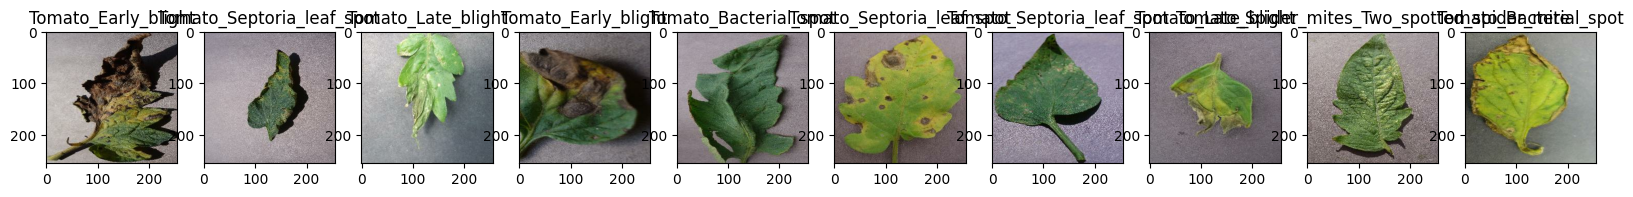

In [21]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(CLASS_NAMES[batch[1][idx]])

In [22]:
#train test split
train_size = int(len(dataset)*.8)
val_size = int(len(dataset)*.1)
test_size = int(len(dataset)*.1)+1

In [69]:
train = dataset.take(train_size)
validation = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [71]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [72]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [73]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [78]:
n_classes = 7
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3))

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [81]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [82]:
history = model.fit(
    train,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=validation
)

Epoch 1/50
276/276 [==============================] - 584s 2s/step - loss: 1.6136 - accuracy: 0.3731 - val_loss: 1.8963 - val_accuracy: 0.3879
Epoch 2/50
276/276 [==============================] - 567s 2s/step - loss: 1.0333 - accuracy: 0.6114 - val_loss: 1.0049 - val_accuracy: 0.6801
Epoch 3/50
276/276 [==============================] - 561s 2s/step - loss: 0.7748 - accuracy: 0.7099 - val_loss: 0.8597 - val_accuracy: 0.7270
Epoch 4/50
276/276 [==============================] - 563s 2s/step - loss: 0.6182 - accuracy: 0.7721 - val_loss: 0.7535 - val_accuracy: 0.7656
Epoch 5/50
276/276 [==============================] - 571s 2s/step - loss: 0.5100 - accuracy: 0.8170 - val_loss: 0.5981 - val_accuracy: 0.8272
Epoch 6/50
276/276 [==============================] - 575s 2s/step - loss: 0.4460 - accuracy: 0.8406 - val_loss: 0.7789 - val_accuracy: 0.7693
Epoch 7/50
276/276 [==============================] - 561s 2s/step - loss: 0.3868 - accuracy: 0.8620 - val_loss: 0.5192 - val_accuracy: 0.8575

KeyboardInterrupt: 